<a href="https://colab.research.google.com/github/namanverma4321/PortfolioProjects/blob/main/Intent_Classification_for_Customer_Service_using_HuggingFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [ ]:
!pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.9/518.9 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.7 MB/s eta 0:00:00


# Imports

In [ ]:
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import re
import string
import time
from numpy import random
import gensim.downloader as api
from PIL import Image
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Dense,Flatten,InputLayer,BatchNormalization,Dropout,Input,LayerNormalization
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import (BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives,
                                       TrueNegatives, Precision, Recall, AUC, binary_accuracy,Accuracy,
                                       TopKCategoricalAccuracy, CategoricalAccuracy,SparseCategoricalAccuracy)
from tensorflow.keras.optimizers import Adam
from google.colab import drive
from google.colab import files
from datasets import load_dataset
from transformers import (BertTokenizerFast,TFBertTokenizer,BertTokenizer,RobertaTokenizerFast,
                          DataCollatorWithPadding,TFRobertaForSequenceClassification,TFBertForSequenceClassification,
                          TFBertModel,create_optimizer,TFDebertaForSequenceClassification,DebertaTokenizerFast)

In [ ]:
BATCH_SIZE=16

# Data Preparation

In [ ]:
!pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d bitext/training-dataset-for-chatbotsvirtual-assistants
!unzip "/content/training-dataset-for-chatbotsvirtual-assistants.zip" -d "/content/dataset/"

 86% 1.00M/1.16M [00:00<00:00, 2.00MB/s]
100% 1.16M/1.16M [00:00<00:00, 2.24MB/s]
Archive:  /content/training-dataset-for-chatbotsvirtual-assistants.zip
  inflating: /content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.csv  
  inflating: /content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.xlsx  
  inflating: /content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/LICENSE.txt  
  inflating: /content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bit

In [ ]:
dataset=load_dataset("csv",
                       data_files="/content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.csv")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['flags', 'utterance', 'category', 'intent'],
        num_rows: 21534
    })
})

In [ ]:
dataset['train'][0]

{'flags': 'BILC',
 'utterance': "I don't have an online account, what do I have to do to register?",
 'category': 'ACCOUNT',
 'intent': 'create_account'}

In [ ]:
intents=list(set(dataset['train']['intent']))
dict_intents={intents[i]: i for i in range(len(intents))}
print(dict_intents)
print(len(intents))

{'registration_problems': 0, 'get_invoice': 1, 'track_refund': 2, 'review': 3, 'check_payment_methods': 4, 'edit_account': 5, 'recover_password': 6, 'delivery_options': 7, 'track_order': 8, 'change_order': 9, 'change_shipping_address': 10, 'delete_account': 11, 'switch_account': 12, 'payment_issue': 13, 'check_refund_policy': 14, 'check_invoices': 15, 'create_account': 16, 'get_refund': 17, 'set_up_shipping_address': 18, 'cancel_order': 19, 'contact_customer_service': 20, 'contact_human_agent': 21, 'place_order': 22, 'delivery_period': 23, 'check_cancellation_fee': 24, 'newsletter_subscription': 25, 'complaint': 26}
27


In [ ]:
def preprocess(dataset):
  return {'utterance':dataset['utterance'],
          'intent':dict_intents[dataset['intent']]}

In [ ]:
prep_dataset=dataset.map(preprocess)

Map:   0%|          | 0/21534 [00:00<?, ? examples/s]

In [ ]:
prep_dataset['train'][0]

{'flags': 'BILC',
 'utterance': "I don't have an online account, what do I have to do to register?",
 'category': 'ACCOUNT',
 'intent': 16}

In [ ]:
model_id="microsoft/deberta-base"
tokenizer = DebertaTokenizerFast.from_pretrained(model_id)

In [ ]:
def tokenizer_function(dataset):
  return tokenizer(dataset["utterance"],)

In [ ]:
tokenized_dataset=prep_dataset.map(tokenizer_function)

Map:   0%|          | 0/21534 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['flags', 'utterance', 'category', 'intent', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 21534
    })
})

In [ ]:
tokenized_dataset['train'][0]

{'flags': 'BILC',
 'utterance': "I don't have an online account, what do I have to do to register?",
 'category': 'ACCOUNT',
 'intent': 16,
 'input_ids': [1,
  100,
  218,
  75,
  33,
  41,
  804,
  1316,
  6,
  99,
  109,
  38,
  33,
  7,
  109,
  7,
  5124,
  116,
  2],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

In [ ]:
tf_dataset = tokenized_dataset["train"].to_tf_dataset(
    columns=['input_ids','attention_mask', 'intent'],
    shuffle=True,
    batch_size=BATCH_SIZE,
    collate_fn=data_collator
)

You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [ ]:
def swap_positions(dataset):
  return {'input_ids':dataset['input_ids'],
          'attention_mask':dataset['attention_mask'],},dataset['intent']

In [ ]:
tf_dataset=tf_dataset.map(swap_positions)

In [ ]:
train_dataset=tf_dataset.take(int(0.9*len(tf_dataset)))
val_dataset=tf_dataset.skip(int(0.9*len(tf_dataset)))

In [ ]:
for i in val_dataset.take(1):
  print(i)

({'input_ids': <tf.Tensor: shape=(16, 27), dtype=int64, numpy=
array([[    1,   118,   685,   127,  1087,     6,   244,   162,  1649,
           24,     2,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0],
       [    1,   100,    64,    75,  1346,    47,     8,    38,   236,
            7,  1994,    19,   951,     2,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0],
       [    1,   118, 23126,   216,   114,   939,    64,   464,   127,
         2229,     2,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0],
       [    1,   100,    33,    10,   864,     8,    38,   236,     7,
         1511, 33536,  1841,     2,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0],
       [    1,  4970,    41,  2936, 13383,   939,    64, 24442,    10,
         3

# Modeling

## Based on TFDebertaForSequenceClassification

In [ ]:
model=TFDebertaForSequenceClassification.from_pretrained(model_id,num_labels=len(intents))
model.summary()

All model checkpoint layers were used when initializing TFDebertaForSequenceClassification.

Some layers of TFDebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler', 'cls_dropout', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_deberta_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 deberta (TFDebertaMainLayer  multiple                 138601728 
 )                                                               
                                                                 
 pooler (TFDebertaContextPoo  multiple                 590592    
 ler)                                                            
                                                                 
 cls_dropout (TFDebertaStabl  multiple                 0         
 eDropout)                                                       
                                                                 
 classifier (Dense)          multiple                  20763     
                                                                 
Total params: 139,213,083
Trainable params: 139,213,083
Non-trainable params: 0
______________

# Training

In [ ]:
num_epochs = 2
batches_per_epoch = len(tokenized_dataset["train"]) // BATCH_SIZE
total_train_steps = int(batches_per_epoch * num_epochs)

In [ ]:
optimizer, schedule = create_optimizer(init_lr=2e-5,num_warmup_steps=0, num_train_steps=total_train_steps)

In [ ]:
model.compile(optimizer=optimizer,
    metrics=["accuracy"])

In [ ]:
history=model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=2,)

Epoch 1/2


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


1211/1211 [==============================] - 403s 254ms/step - loss: 0.2419 - accuracy: 0.9460 - val_loss: 0.0054 - val_accuracy: 0.9995
Epoch 2/2
1211/1211 [==============================] - 295s 243ms/step - loss: 0.0072 - accuracy: 0.9991 - val_loss: 0.0013 - val_accuracy: 1.0000


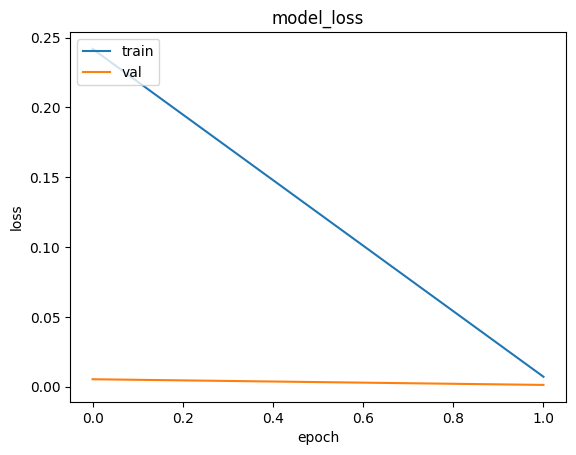

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

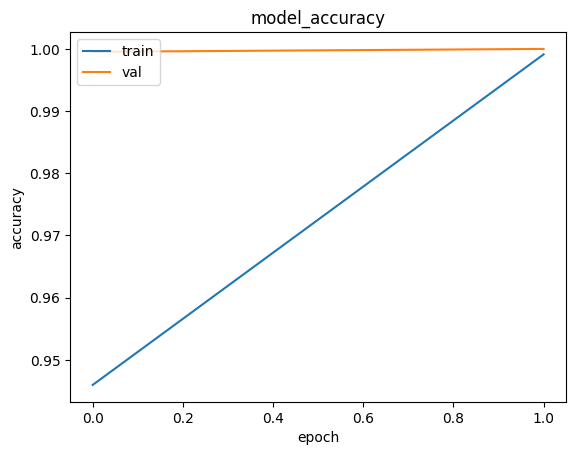

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Evaluation

## Confusion Matrix

In [ ]:
predicted = []
labels = []

for input, label in val_dataset:
  predicted.append(model(**input).logits)
  labels.append(label.numpy())

In [ ]:
print(predicted)
print(labels)

[<tf.Tensor: shape=(16, 27), dtype=float32, numpy=
array([[-1.6303846 ,  0.05565133, -0.61684084, -0.2700605 , -1.1111336 ,
        -1.2155083 , -1.0140568 , -1.4237069 ,  0.22059998,  0.838411  ,
        -0.80682707, -0.69285244, -0.69025767, -0.32856417, -0.8691068 ,
         0.08392177, -0.8058635 ,  0.18821247, -1.6123459 , -0.860182  ,
        -0.23283394,  9.699268  , -1.3218535 , -1.6977525 , -1.3526175 ,
        -0.49490958,  0.56895447],
       [-1.1569214 ,  9.913311  , -1.7185675 , -1.4048774 , -0.18635866,
        -1.5426942 , -0.90489346, -0.5548125 , -2.4763577 , -1.1628671 ,
        -1.3155383 , -1.1474434 , -0.5273113 , -0.30459324, -0.91691047,
        -0.01421456, -0.7333294 ,  0.36118716, -0.41409805, -0.54048   ,
        -0.6177661 , -0.54184645, -0.31009474, -0.5166253 , -0.6758891 ,
        -0.16775776, -1.3014052 ],
       [-1.3536581 , -0.4644275 , -2.0216215 , -0.6618822 , -0.9073589 ,
        -0.78112155, -0.3959544 , -0.762829  ,  0.98348975, -0.24978414,
   

In [ ]:
print(tf.argmax(predicted[:-1],axis=-1).numpy())
print(labels[:-1])

[[21  1 20 ... 20 11  6]
 [15  6  1 ...  1 13 20]
 [11  6  6 ... 13 20 13]
 ...
 [13 13  8 ... 13 13 15]
 [ 8  1 20 ...  9 13  2]
 [26 15 11 ...  3 13  3]]
[array([21,  1, 20,  9,  2, 16, 20, 16,  9, 12,  4, 24, 15, 20, 11,  6]), array([15,  6,  1,  8, 17, 20, 26, 26,  5, 21, 13, 16,  6,  1, 13, 20]), array([11,  6,  6, 13,  4, 20,  1, 13,  9, 13, 13,  1, 16, 13, 20, 13]), array([16, 26, 13, 20, 14, 13, 13,  7, 15, 20, 16,  1,  1, 17, 21, 11]), array([ 3,  8, 13,  9, 16, 13,  1, 20, 16, 15, 13,  8, 16,  7, 20, 11]), array([17, 26, 13, 16, 13, 16, 13,  9, 16, 11, 16, 13, 21, 20,  7, 20]), array([17, 20, 26,  8,  6, 16, 14, 12, 20, 21,  8,  6,  6, 11, 15,  9]), array([ 3, 13,  1, 13, 13, 15, 22, 20, 16, 26, 26, 20,  9, 13, 20, 13]), array([ 1,  1,  5, 21, 15, 20, 13,  8,  6, 20, 17, 20, 20, 13, 13, 11]), array([16, 20, 12,  2, 21, 18, 13,  6,  2,  2, 16, 17, 16, 13, 15, 13]), array([20, 16,  8,  7, 21, 25, 20, 16, 16,  8,  9, 15, 26, 10,  6, 14]), array([17, 23, 23, 21, 20, 11, 11, 15, 2

In [ ]:
print(np.concatenate([np.array(labels[:-1]).flatten(),np.array(labels[-1]).flatten()]))
print(np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()]))

[21  1 20 ...  6 13 20]
[21  1 20 ...  6 13 20]


In [ ]:
pred=np.concatenate([np.array(labels[:-1]).flatten(),np.array(labels[-1]).flatten()])
lab=np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()])

[[ 17   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0 144   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0  32   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0  49   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  20   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  18   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 103   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  46   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 120   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 

Text(0.5, 146.7222222222222, 'Predicted')

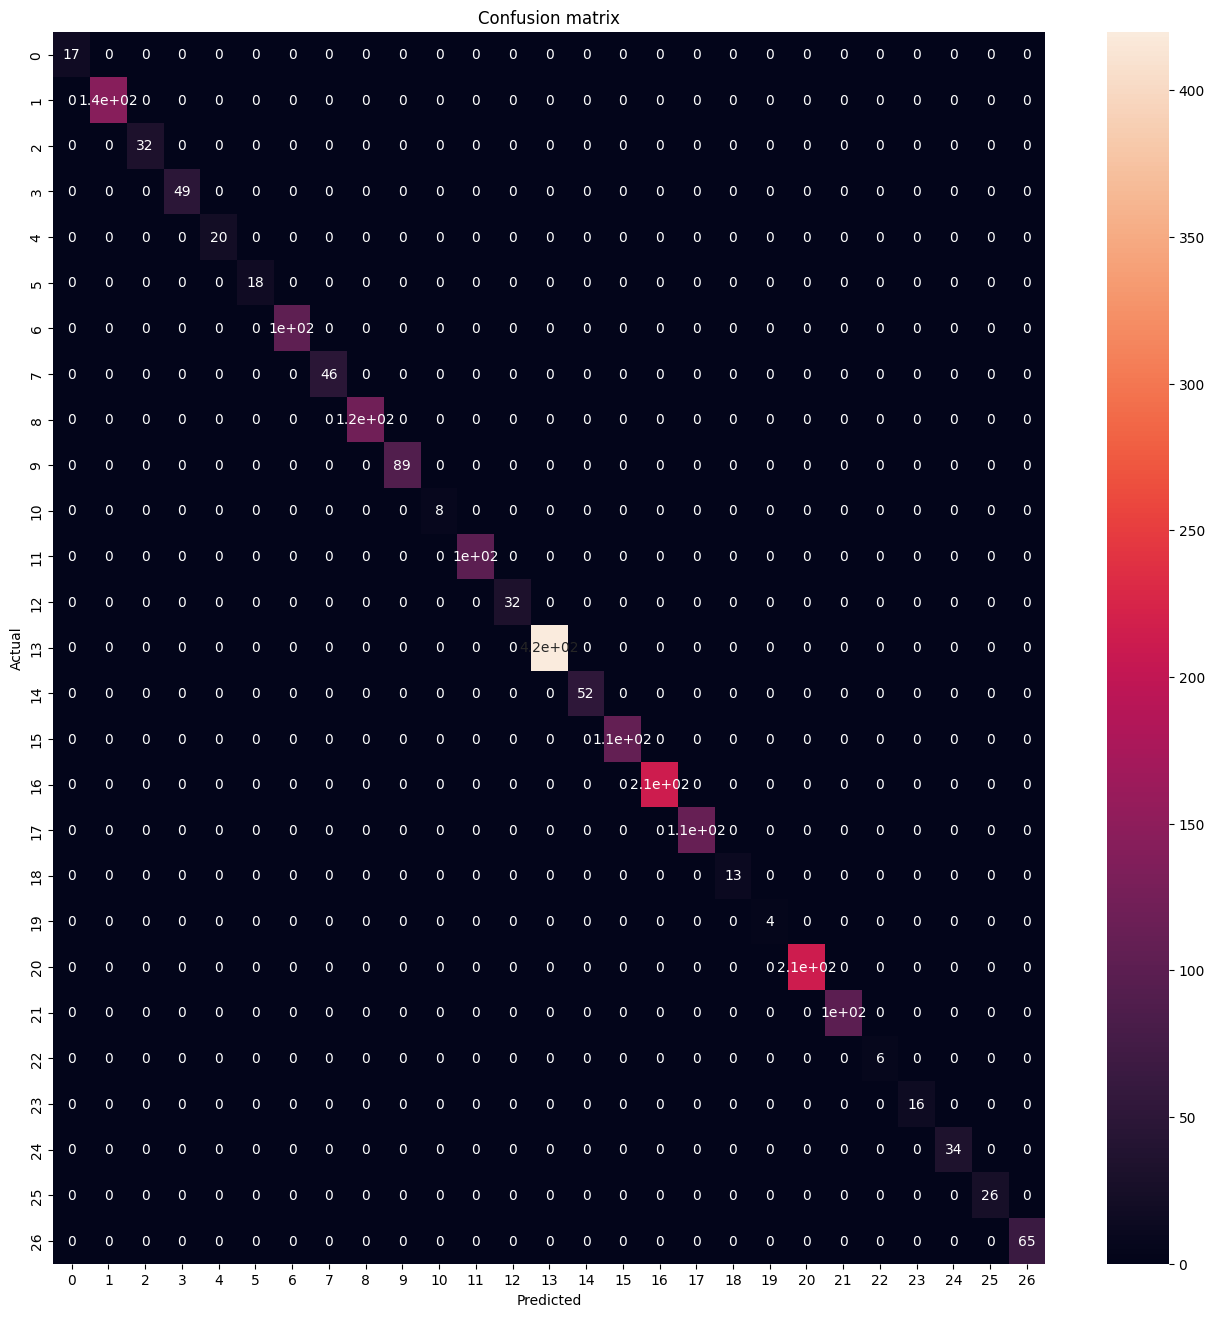

In [ ]:
cm = confusion_matrix(lab, pred)
print(cm)
plt.figure(figsize=(16,16))

sns.heatmap(cm, annot=True,)
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Testing


In [ ]:
inputs = tokenizer(["Please how do i go about the account creation? ",
                    "After setting up my account, i feel like i need to change it. How do i go about that?",
                    "how do i know how much i need to pay?",
                    "purchased a product, which i now want to change"
                    ], padding=True,return_tensors="tf")

logits = model(**inputs).logits
outputs=tf.argmax(logits,axis=-1).numpy()

In [ ]:
print(outputs)

[0 5 4 9]


In [ ]:
reverse_dict_intents={i:intents[i] for i in range(len(intents))}
print(reverse_dict_intents)

{0: 'registration_problems', 1: 'get_invoice', 2: 'track_refund', 3: 'review', 4: 'check_payment_methods', 5: 'edit_account', 6: 'recover_password', 7: 'delivery_options', 8: 'track_order', 9: 'change_order', 10: 'change_shipping_address', 11: 'delete_account', 12: 'switch_account', 13: 'payment_issue', 14: 'check_refund_policy', 15: 'check_invoices', 16: 'create_account', 17: 'get_refund', 18: 'set_up_shipping_address', 19: 'cancel_order', 20: 'contact_customer_service', 21: 'contact_human_agent', 22: 'place_order', 23: 'delivery_period', 24: 'check_cancellation_fee', 25: 'newsletter_subscription', 26: 'complaint'}


In [ ]:
for i in outputs:
  print(reverse_dict_intents[i])

registration_problems
edit_account
check_payment_methods
change_order
